### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Prepare data

In [2]:
# loading data
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# shape of data
df.shape

(103904, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
# drop 2 columns 'Unnamed: 0', 'id'
df.drop(columns=['Unnamed: 0', 'id'],inplace=True)

In [6]:
# checking nan values
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

### Arrival Delay in Minutes

In [7]:
df['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

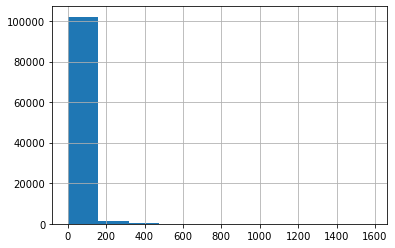

In [8]:
df['Arrival Delay in Minutes'].hist();

- **values in this column are right skewed so, I fill nan values with median**

In [9]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(),inplace=True)

In [10]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

- There is no nan values 

### satisfaction                       

In [11]:
# define function countplot to visual any categorical data
def countplot(df,x,hue=None):
    print(x.value_counts())
    sns.countplot(data=df, x=x)
    plt.show()
    sns.countplot(data=df, x=x, hue=hue)
    plt.show()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


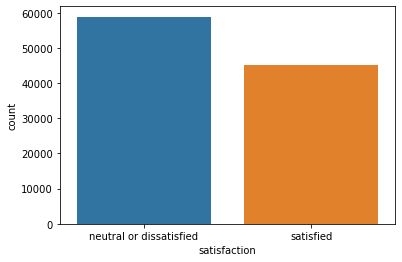

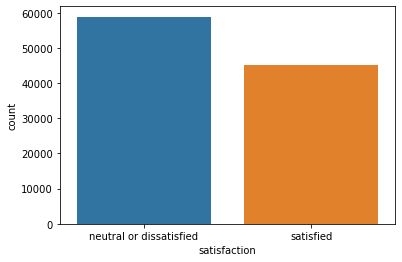

In [12]:
countplot(df,df['satisfaction']);

###  Gender 

Female    52727
Male      51177
Name: Gender, dtype: int64


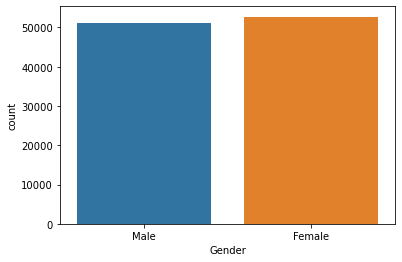

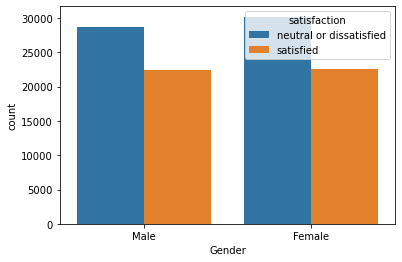

In [13]:
countplot(df,df['Gender'],df['satisfaction']);

### Customer type

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64


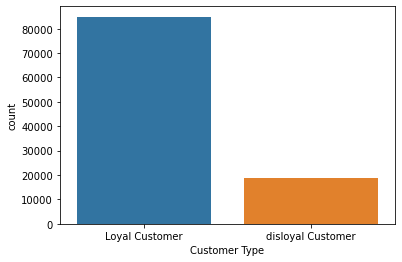

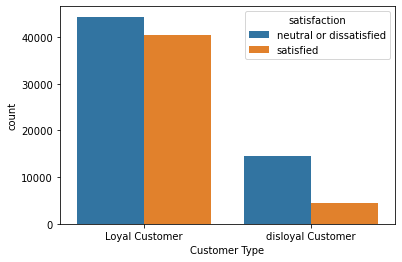

In [14]:
countplot(df,df['Customer Type'],df['satisfaction']);

### Type of Travel

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64


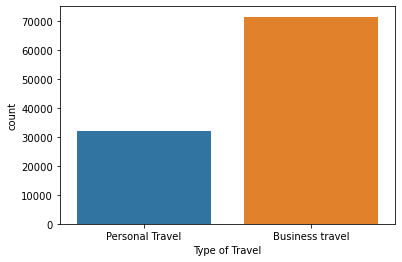

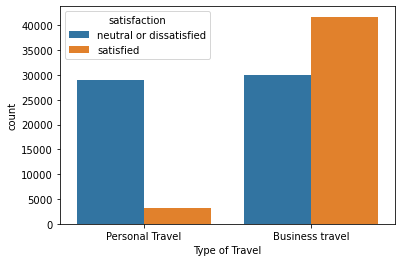

In [15]:
countplot(df,df['Type of Travel'],df['satisfaction']);

### Class

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64


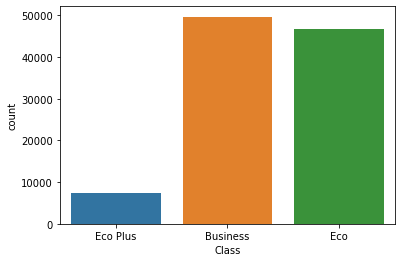

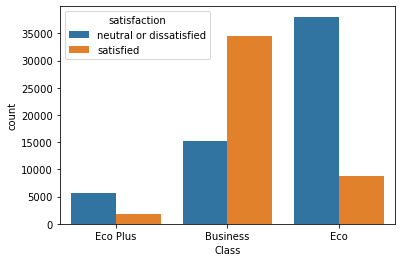

In [16]:
countplot(df,df['Class'],df['satisfaction']);

**From these visuals**
- if type of travel is business and class is business, they are likely to be satisfied
- if class is ECO, the passengers are likely to dissatisfied or neutral

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [18]:
categorical_features = ['Gender','Customer Type','Type of Travel','Class','satisfaction']
# df_numeric = df[]

In [19]:
df_numeric = df.drop(columns=categorical_features)
df_numeric.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [20]:
df_numeric.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Departure and Arrival Delay in Minutes

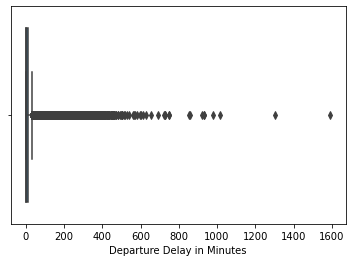

In [21]:
sns.boxplot(x=df['Departure Delay in Minutes']);

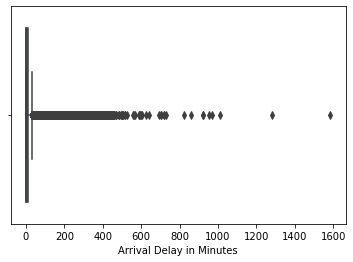

In [22]:
sns.boxplot(x=df['Arrival Delay in Minutes']);

In [23]:
def outlier(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    mx = q3 + 1.5*iqr
    return mx

In [24]:
mx_arrival = outlier(df['Arrival Delay in Minutes'])
mx_departure = outlier(df['Departure Delay in Minutes'])

In [25]:
len(df[df['Arrival Delay in Minutes'] > mx_arrival])

13954

In [26]:
len(df[df['Departure Delay in Minutes'] > mx_departure])

14529

#### Impute outlier values with median

In [27]:
for val in df['Arrival Delay in Minutes']:
    if val > mx_arrival :
            df['Arrival Delay in Minutes'] =  df['Arrival Delay in Minutes'].replace(val, df['Arrival Delay in Minutes'].median())

In [28]:
for val in df['Departure Delay in Minutes']:
        if val > mx_departure :
            df['Departure Delay in Minutes'] =  df['Departure Delay in Minutes'].replace(val, df['Departure Delay in Minutes'].median())

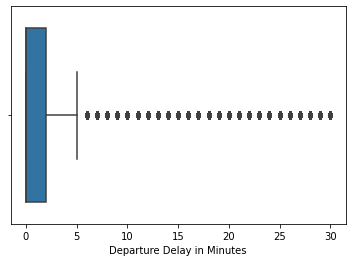

In [29]:
sns.boxplot(x=df['Departure Delay in Minutes']);

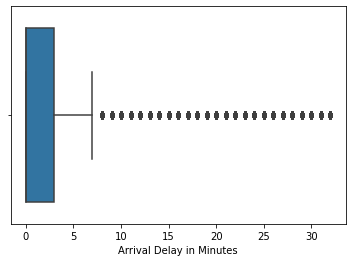

In [30]:
sns.boxplot(x=df['Arrival Delay in Minutes']);

### Flight Distance

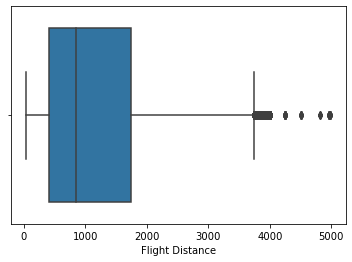

In [31]:
sns.boxplot(x=df['Flight Distance']);

In [32]:
max_flight = outlier(df['Flight Distance'])
max_flight

3736.5

In [33]:
len(df[df['Flight Distance'] > max_flight])

2291

In [34]:
for val in df['Flight Distance']:
        if val > max_flight :
            df['Flight Distance'] =  df['Flight Distance'].replace(val, df['Flight Distance'].median())

<AxesSubplot:>

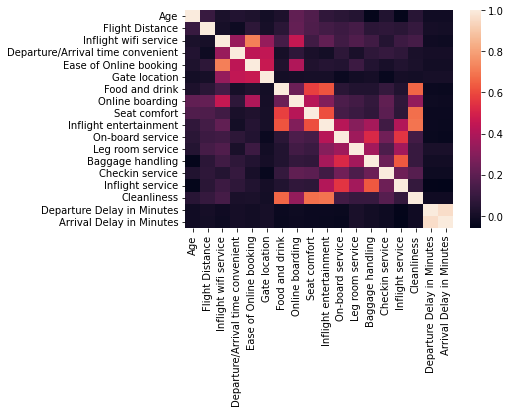

In [35]:
sns.heatmap(df_numeric.corr())

### Encoding categorical data

In [36]:
categorical_features

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

#### Gender

In [37]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [38]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

#### Customer Type

In [39]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [40]:
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':0,'disloyal Customer':1})

#### Type of Travel

In [41]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [42]:
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0,'Business travel':1})

#### Class

In [43]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [44]:
df['Class'] = df['Class'].map({'Eco Plus':0,'Business':1, 'Eco':2})

#### satisfaction

In [45]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [46]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

### split data and building model

In [48]:
X = df.drop(columns='satisfaction')
y = df['satisfaction']

In [49]:
print(X.shape)
print(y.shape)

(103904, 22)
(103904,)


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train)
X_test = min_max.transform(X_test)

### XGboost

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

model_xg = XGBClassifier()
model_xg.fit(X_train,y_train)
pred_xg = model_xg.predict(X_test)

### LGBMClassifier

In [53]:
import lightgbm as ltb
model_lgbm = ltb.LGBMClassifier()
model_lgbm.fit(X_train,y_train)
pred_lgbm = model_lgbm.predict(X_test)

### RandomForest

In [54]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier()
model_forest.fit(X_train,y_train)
pred_forest = model_forest.predict(X_test)

## Evaluation Models

In [55]:
models = {'XGBClassifier':accuracy_score(y_test,pred_xg),
         'LGBMClassifier':accuracy_score(y_test,pred_lgbm),
          'RandomForestClassifier':accuracy_score(y_test,pred_forest)
         }

pd.DataFrame(models, index=[0])

,XGBClassifier,LGBMClassifier,RandomForestClassifier
0,0.961279,0.96298,0.962049


In [56]:
print('XGBClassifier')
print(classification_report(y_test,pred_xg))
print('----------------------------------------')
print('LGBMClassifier')
print(classification_report(y_test,pred_lgbm))
print('----------------------------------------')
print('RandomForestClassifier')
print(classification_report(y_test,pred_forest))

XGBClassifier
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17555
           1       0.97      0.94      0.96     13617

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172

----------------------------------------
LGBMClassifier
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     17555
           1       0.97      0.94      0.96     13617

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172

----------------------------------------
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     17555
           1       0.97      0.94      0.96     13617

    accuracy                           0.96     

### Accuracy is similar in all three models